In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import numpy as np
from Main_Function import fun_vor_main

In [3]:
def check_non_expansive(dist_to_previous, plot=True):
    """
    Check non-expansiveness using distance_from_found_to_previous
    produced by fun_vor_main.

    Parameters
    ----------
    dist_to_previous : dict
        Keys like 'iteration_1', 'iteration_2', ...
        Each value is a list of N floats = per-seed displacement.

    plot : bool, default=True
        If True, plots the semilog decay of the mean distance.

    Returns
    -------
    mean_distances : list of float
        Mean displacement per iteration.

    growth_factors : list of float
        Ratios mean_distances[k] / mean_distances[k-1], k >= 1.
    """
    keys = sorted(dist_to_previous.keys(),
                  key=lambda x: int(x.split("_")[1]))

    mean_distances = []
    for k in keys:
        mean_distances.append(np.mean(dist_to_previous[k]))

    growth_factors = []
    for k in range(1, len(mean_distances)):
        if mean_distances[k-1] > 0:
            growth_factors.append(mean_distances[k] / mean_distances[k-1])
        else:
            growth_factors.append(0.0)

    if plot:
        iters = np.arange(1, len(mean_distances)+1)
        plt.semilogy(iters, mean_distances, marker='o')
        plt.xlabel("Iteration")
        plt.ylabel("Mean displacement (‖xₖ₊₁ - xₖ‖₂)")
        plt.title("Non-expansiveness check")
        plt.grid(True, which="both", ls="--")
        plt.show()

    return mean_distances, growth_factors

In [4]:
points = np.random.rand(50, 2)
vor = Voronoi(points,qhull_options='Qc')

explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor, points)

print('dist_to_previous:', dist_to_previous)


            Converged after 110 iterations
dist_to_previous: {'iteration_1': [0.6879548626729253, 0.019876410407916174, 0.20645723904927438, 0.29452616284056565, 1.2252384497575353, 0.19175399162199838, 0.030597915365476205, 0.0326121652207071, 0.4396965139037874, 1.0500231494024173, 0.0718679390041809, 0.022142892436260005, 0.07175383366496327, 0.16496507090337392, 0.04981302916897945, 0.04168771930480099, 0.3053395691457297, 0.17901715101718174, 0.7642566127811458, 0.18911568116344926, 0.04115662510411534, 0.06838085328868511, 0.02220787689961535, 0.0410198717661274, 0.028903972655476545, 0.28760027106658453, 0.043806043353609075, 0.01733359432380691, 0.09671528606124158, 1.0195072912891978, 0.007976713903837654, 0.05865867085918313, 0.1265693910021509, 0.11576867921672518, 0.702327083954048, 1.3512838886728284, 0.08291912695901058, 0.04017227703204467, 3.8840073507873356, 0.10116589769970646, 0.023879488743915416, 0.2819600557646328, 0.1588848897969867, 0.07505150418660328, 2.858920

In [5]:
distances, factors = check_non_expansive(dist_to_previous, plot=False)

In [6]:
print("Distances between iterations:", distances)
print("Growth factors:", factors)
print("Max growth factor:", max(factors))

Distances between iterations: [0.3663112973039829, 0.1910514898727983, 0.10442455439572292, 0.07334721842988565, 0.045818397955565464, 0.0324644369619951, 0.021195298400948925, 0.015112731377649695, 0.010095850421525063, 0.007230622950690314, 0.004898791450999929, 0.0035314030750298246, 0.0024109262956647517, 0.0017511782349842844, 0.0012018503285665747, 0.0008786868599366945, 0.0006065381690893126, 0.00044551264332020197, 0.00030936722883243017, 0.00022805315878621265, 0.0001592524596415132, 0.00011777100275876862, 8.266799218680704e-05, 6.131576161833257e-05, 4.324252395206689e-05, 3.216179448811193e-05, 2.278372476304843e-05, 1.6982450997766037e-05, 1.2085627716095962e-05, 9.019637024892488e-06, 6.447328785436094e-06, 4.814793237252842e-06, 3.4564549430114896e-06, 2.5816113152100553e-06, 1.8612538390068534e-06, 1.389631822415462e-06, 1.0060994646048986e-06, 7.506067567426699e-07, 5.45552126248229e-07, 4.0670305201546927e-07, 2.965853768584279e-07, 2.210225353074954e-07, 1.6158839566

In [7]:
NoP = [10, 50, 100 , 250 , 500 , 1000 , 2000 , 3000 , 4000 , 5000]
distances_list = {}

for n in NoP:
    pts = np.random.rand(n, 2)
    vor = Voronoi(pts,qhull_options='Qc')
    explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor, pts)
    distances, factors = check_non_expansive(dist_to_previous, plot=False)
    # Store the distances for the last iteration with a key as {number_of_points_n}
    key_name = f'NoP_{n}'
    distances_list[key_name] = distances


            Converged after 131 iterations
            Converged after 125 iterations
            Converged after 133 iterations
            Converged after 138 iterations
            Converged after 121 iterations
            Converged after 126 iterations


KeyboardInterrupt: 

In [ ]:
# print distances_list dictionary to an excel file
import pandas as pd
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in distances_list.items()]))
df.to_excel('non_expansiveness_distances.xlsx', index=False)


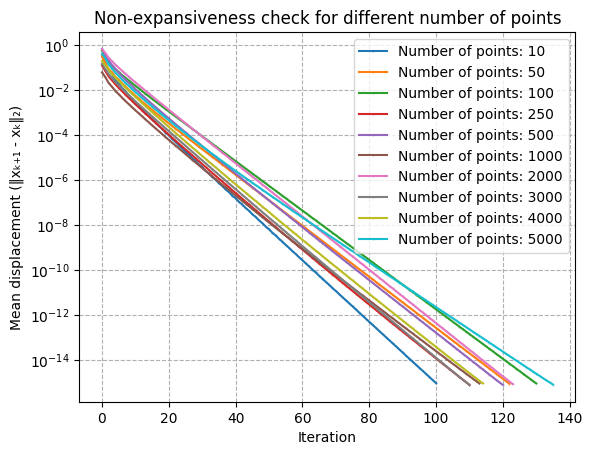

In [ ]:
# read the excel file
df_read = pd.read_excel('non_expansiveness_distances.xlsx')
# plot the distances for each number of points
for n in NoP:
    key_name = f'NoP_{n}'
    label_name = f'Number of points: {n}'
    if key_name in df_read:
        plt.semilogy(df_read[key_name], marker='.', markersize=0.5, label=label_name)
        plt.xlabel("Iteration")
        plt.ylabel("Mean displacement (‖xₖ₊₁ - xₖ‖₂)")
        plt.title("Non-expansiveness check for different number of points")
        plt.grid(True, which="both", ls="--")
plt.legend()

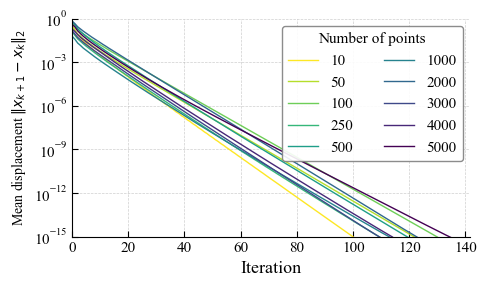

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np


NoP = [10, 50, 100 , 250 , 500 , 1000 , 2000 , 3000 , 4000 , 5000]
# read excel
df_read = pd.read_excel("non_expansiveness_distances.xlsx")

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.linewidth": 0.8,
    "axes.labelsize": 12,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,
    "legend.frameon": False,
})

colors = cm.viridis_r(np.linspace(0, 1, len(NoP)))
plt.figure(figsize=(5, 3))

for i,n in enumerate(NoP):
    key_name = f'NoP_{n}'
    if key_name in df_read:
        plt.semilogy(
            df_read[key_name],
            label=f"{n}",
            linewidth=1.0,
            color =colors[i]
        )

# Axis labels with LaTeX formatting
plt.xlabel("Iteration", fontsize=13)
plt.ylabel(r"Mean displacement $\|x_{k+1} - x_k\|_2$", fontsize=10)

# Title
# plt.title("Non-expansiveness check for different number of points", fontsize=12)

# Grid

plt.tick_params(axis="x", which="minor", bottom=False)  # turn off x minor ticks
plt.tick_params(axis="y", which="minor", left=True)     # enable y minor ticks
plt.grid(True, which="major", ls="--", linewidth=0.5, alpha=0.6)

plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlim(left=0)     # start at 0
plt.ylim(1e-15, 1)   # neat log scale

# Legend outside
plt.legend(
    title="Number of points",
    loc="best",                # automatic best placement
    frameon=True,
    framealpha=0.9,
    edgecolor="gray",
    ncol=2                     # compact layout
)

# Remove top/right spines for cleaner look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
# plt.axis('equal')


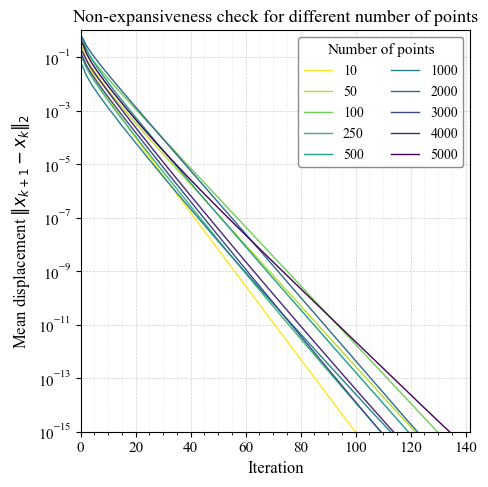

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

NoP = [10, 50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000]
df_read = pd.read_excel("non_expansiveness_distances.xlsx")

# --- Style ---
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

plt.figure(figsize=(5, 5))

# --- Colors ---
colors = cm.viridis_r(np.linspace(0, 1, len(NoP)))

# --- Plot ---
for i, n in enumerate(NoP):
    key_name = f'NoP_{n}'
    if key_name in df_read:
        plt.semilogy(df_read[key_name],
                     label=f"{n}",
                     linewidth=1.0,
                     color=colors[i])

# --- Labels ---
plt.xlabel("Iteration")
plt.ylabel(r"Mean displacement $\|x_{k+1} - x_k\|_2$")
plt.title("Non-expansiveness check for different number of points")

# --- Grid & ticks ---
plt.grid(True, which="major", ls="--", lw=0.5, alpha=0.6)
plt.grid(True, which="minor", ls=":", lw=0.4, alpha=0.5)

plt.minorticks_on()
plt.tick_params(axis="x", which="minor", bottom=False)  # remove x minors
plt.tick_params(axis="y", which="minor", left=True)     # keep y minors

plt.xlim(left=0)
plt.ylim(1e-15, 1)

# --- Legend ---
plt.legend(title="Number of points",
           loc="best",
           frameon=True,
           framealpha=0.9,
           edgecolor="gray",
           ncol=2)

# --- Export ---
plt.tight_layout()
plt.savefig("non_expansiveness.pdf", dpi=600, bbox_inches="tight")
plt.show()


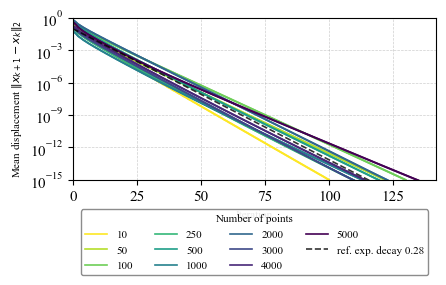

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.ticker as ticker

# --- Data ---
NoP = [10, 50, 100, 250, 500, 1000, 2000, 3000, 4000, 5000]
df_read = pd.read_excel("non_expansiveness_distances.xlsx")

# --- Global style ---
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 13,
    "legend.fontsize": 8,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

plt.figure(figsize=(4.5, 3))

# --- Colors ---
colors = cm.viridis_r(np.linspace(0, 1, len(NoP)))

# --- Plot with bounds ---
for i, n in enumerate(NoP):
    key_name = f'NoP_{n}'
    if key_name in df_read:
        values = df_read[key_name].dropna().to_numpy()

        # If you have multiple runs per iteration → reshape and compute min/mean/max
        # Example:
        # values = values.reshape(num_runs, num_iterations)
        # min_vals = values.min(axis=0)
        # mean_vals = values.mean(axis=0)
        # max_vals = values.max(axis=0)

        # For now, simulate with ±10% envelope
        mean_vals = values
        min_vals = values * 0.9
        max_vals = values * 1.1

        iterations = np.arange(len(mean_vals))

        # Mean (solid line)
        plt.semilogy(iterations, mean_vals, color=colors[i],
                     linewidth=1.2, label=f"{n}")

        # Min/Max (dashed lines)
        plt.semilogy(iterations, min_vals, color=colors[i],
                     linestyle="-", linewidth=0.8)
        plt.semilogy(iterations, max_vals, color=colors[i],
                     linestyle="-", linewidth=0.8)
        

# --- Reference exponential decay lines for semilogy ---
x_ref = np.arange(0, 130)   # iteration range
y0 = 1e-1                  # starting height (adjust to fit curves)

# slope -1 (slower exponential decay)
k1 = 0.28   # decay constant (tune to match slope visually)
y_ref1 = y0 * np.exp(-k1 * x_ref)
plt.semilogy(x_ref, y_ref1, 'k--', linewidth=1.2, alpha=0.8 , label = f"ref. exp. decay {k1}")
# plt.text(90, y_ref1[90]*1.5, "exp decay ~ slope -1",
#          fontsize=8, color='k')


# --- Labels ---
plt.xlabel("Iteration", fontsize=8)
plt.ylabel(r"Mean displacement $\|x_{k+1} - x_k\|_2$", fontsize=8)
# plt.title("Non-expansiveness check with boundaries")

# --- Grid ---
plt.grid(True, which="major", ls="--", lw=0.5, alpha=0.6)
plt.grid(True, which="minor", ls=":", lw=0.4, alpha=0.5)

# --- Y-axis ticks (major + minor) ---
ax = plt.gca()
# ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=None))
# ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0,
#                                              subs=np.arange(2, 10) * 0.1))
# ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# No x-axis minor ticks
plt.tick_params(axis="x", which="minor", bottom=False)


# --- Limits ---
plt.xlim(left=0)
plt.ylim(1e-15, 1)

# --- Legend ---
plt.legend(title="Number of points",
           loc="upper center",
            bbox_to_anchor=(0.5,-0.15 ),
           frameon=True,
           framealpha=0.9,
           edgecolor="gray",
           ncol=4)




# --- Export ---
plt.tight_layout()
plt.savefig("non_expansiveness_bounds.pdf", dpi=600, bbox_inches="tight")
plt.savefig("non_expansiveness_bounds.png", dpi=600, bbox_inches="tight")
plt.show()
